In [1]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [21]:
mrk_data = pd.read_csv('bank-additional-full.csv', sep = ';')
mrk_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#Data cleaning and Preprocessing

In [22]:
mrk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
# Finding the unique values in each attributes
for x in mrk_data.columns:
    print()
    if mrk_data[x].dtype == 'object':
        print(f'Name of the attribute: {x} ,  <----------------unique values in the attribute: {mrk_data[x].unique()}')



Name of the attribute: job ,  <----------------unique values in the attribute: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of the attribute: marital ,  <----------------unique values in the attribute: ['married' 'single' 'divorced' 'unknown']

Name of the attribute: education ,  <----------------unique values in the attribute: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of the attribute: default ,  <----------------unique values in the attribute: ['no' 'unknown' 'yes']

Name of the attribute: housing ,  <----------------unique values in the attribute: ['no' 'yes' 'unknown']

Name of the attribute: loan ,  <----------------unique values in the attribute: ['no' 'yes' 'unknown']

Name of the attribute: contact ,  <----------------unique values in the attribute: ['telephone' 'cellular']

Name of the at

In [24]:
mrk_data2 = mrk_data.copy()
mrk_data2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Visualization

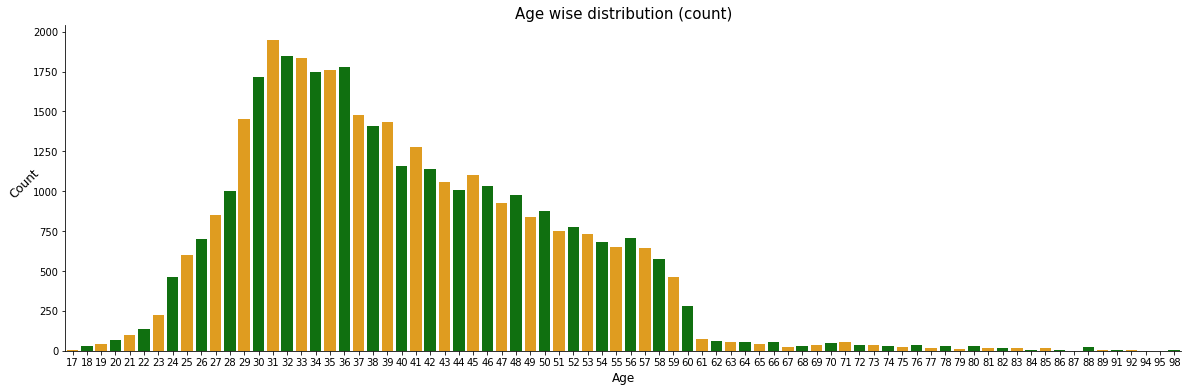

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
sns.countplot(x = mrk_data['age'], palette=['orange', 'green'])
ax.set_xlabel('Age', fontsize=12, color = 'black', rotation = 0)
ax.set_ylabel('Count', color = 'black', fontsize=12, rotation = 45)
ax.set_title('Age wise distribution (count)', color = 'black', fontsize=15)
sns.despine()

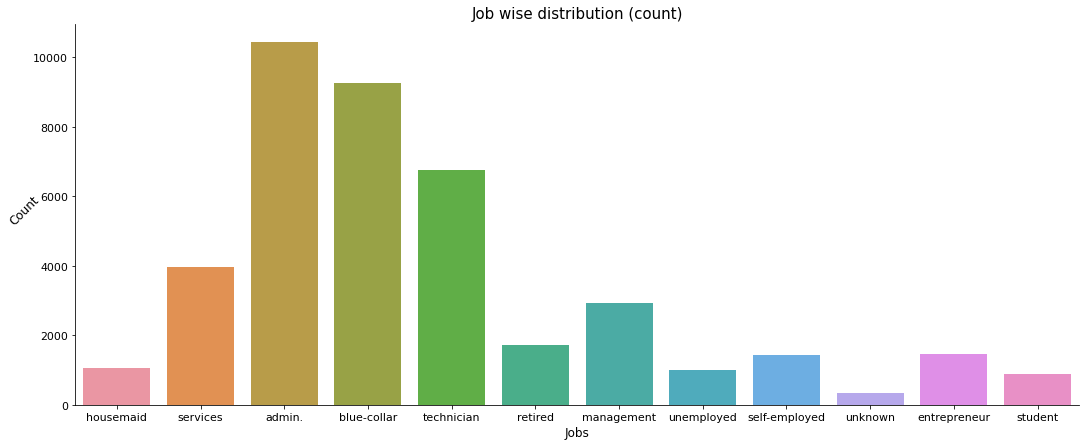

In [26]:
#Job wise distribution (count)
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
sns.countplot(x = mrk_data['job'])
ax.set_xlabel('Jobs', fontsize=12, color = 'black', rotation = 0)
ax.set_ylabel('Count', fontsize=12, color = 'black', rotation = 45)
ax.set_title('Job wise distribution (count)', fontsize=15)
ax.tick_params(labelsize=11)
sns.despine()

Text(0.5, 1.0, 'Marital Status wise distribution (count)')

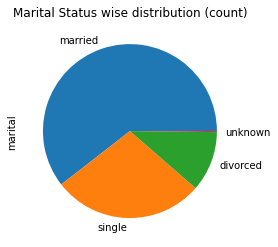

In [33]:
ax1 = mrk_data['marital'].value_counts().plot(kind='pie')
ax1.set_title("Marital Status wise distribution (count)")

Text(0.5, 1.0, 'Housing wise distribution (count)')

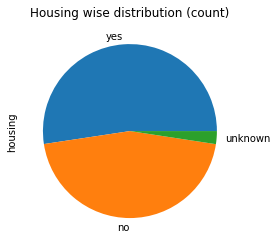

In [38]:
ax1 = mrk_data['housing'].value_counts().plot(kind='pie')
ax1.set_title("Housing wise distribution (count)")

Text(0.5, 1.0, 'Loan wise distribution (count)')

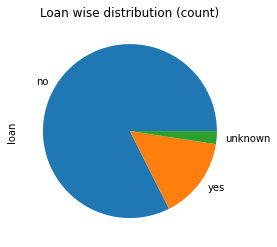

In [41]:
ax1 = mrk_data['loan'].value_counts().plot(kind='pie')
ax1.set_title("Loan wise distribution (count)")

Text(0.5, 1.0, 'Education wise distribution (count)')

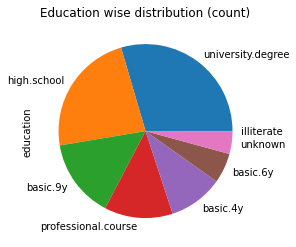

In [42]:
ax1 = mrk_data['education'].value_counts().plot(kind='pie')
ax1.set_title("Education wise distribution (count)")

Text(0.5, 1.0, 'Dependent(Result) Attribute distribution (count)')

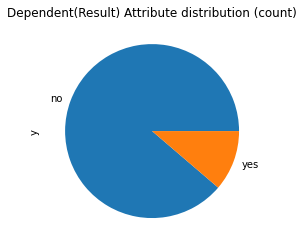

In [44]:
ax1 = mrk_data['y'].value_counts().plot(kind='pie')
ax1.set_title("Dependent(Result) Attribute distribution (count)")

#  Data Transformation

In [46]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
mrk_data['job']      = labelencoder_X.fit_transform(mrk_data['job']) 
mrk_data['marital']  = labelencoder_X.fit_transform(mrk_data['marital']) 
mrk_data['education']= labelencoder_X.fit_transform(mrk_data['education']) 
mrk_data['default']  = labelencoder_X.fit_transform(mrk_data['default']) 
mrk_data['housing']  = labelencoder_X.fit_transform(mrk_data['housing']) 
mrk_data['loan']     = labelencoder_X.fit_transform(mrk_data['loan']) 

mrk_data['contact']     = labelencoder_X.fit_transform(mrk_data['contact']) 
mrk_data['month']       = labelencoder_X.fit_transform(mrk_data['month']) 
mrk_data['day_of_week'] = labelencoder_X.fit_transform(mrk_data['day_of_week']) 


mrk_data['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)


In [47]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 35, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 35) & (dataframe['age'] <= 45), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 45) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70), 'age'] = 4
           
    return dataframe

age(mrk_data);

In [48]:
def duration(data):

    data.loc[data['duration'] <= 100, 'duration'] = 1
    data.loc[(data['duration'] > 100) & (data['duration'] <= 175)  , 'duration']    = 2
    data.loc[(data['duration'] > 175) & (data['duration'] <= 325)  , 'duration']   = 3
    data.loc[(data['duration'] > 325) & (data['duration'] <= 640), 'duration'] = 4
    data.loc[data['duration']  > 640, 'duration'] = 5
    return data
duration(mrk_data);

In [49]:
mrk_data
newmrk_data = mrk_data.copy()
newmrk_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,3,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,3,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,2,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [50]:
newmrk_data = newmrk_data.drop(['y'], axis=1)
newmrk_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,3,1,0,0,0,0,1,6,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,3,7,1,3,1,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,2,7,1,3,0,2,0,1,6,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,2,0,1,1,0,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,3,7,1,3,0,0,2,1,6,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,0,7,0,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,3,1,1,5,0,0,0,0,7,0,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,3,5,1,6,0,2,0,0,7,0,3,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,2,9,1,5,0,0,0,0,7,0,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


#Machine learning Models

In [51]:
final_data= pd.concat([newmrk_data], axis = 1)
final_data = mrk_data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
final_data.shape

(41188, 20)

In [52]:

#Converting dependent variable categorical to dummy
y = pd.get_dummies(mrk_data['y'], columns = ['y'], prefix = ['y'], drop_first = True)
y


,['y']_yes
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size = 0.20, random_state = 101)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [54]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
39577,4,5,1,2,0,0,0,0,6,3,2,-1.8,93.876,-40.0,0.668,5008.7,1,999,2,2
10104,3,9,1,6,0,2,0,1,4,2,4,1.4,94.465,-41.8,4.958,5228.1,1,999,0,1
17235,2,7,1,3,0,0,0,0,3,0,4,1.4,93.918,-42.7,4.962,5228.1,4,999,0,1
20926,1,0,2,6,0,2,0,0,1,2,4,1.4,93.444,-36.1,4.964,5228.1,1,999,0,1
17626,3,2,1,2,0,2,0,0,3,1,2,1.4,93.918,-42.7,4.962,5228.1,5,999,0,1


In [55]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [56]:
X_train

array([[ 2.50115281,  0.35848602, -0.2835433 , ...,  0.19666714,
         3.6801034 ,  1.80591135],
       [ 1.31102204,  1.4726262 , -0.2835433 , ...,  0.19666714,
        -0.35173005, -0.37486923],
       [ 0.12089128,  0.91555611, -0.2835433 , ...,  0.19666714,
        -0.35173005, -0.37486923],
       ...,
       [-1.06923948,  2.02969629, -0.2835433 , ...,  0.19666714,
        -0.35173005, -0.37486923],
       [ 0.12089128, -0.75565417, -0.2835433 , ...,  0.19666714,
        -0.35173005, -0.37486923],
       [ 0.12089128, -0.75565417, -0.2835433 , ...,  0.19666714,
        -0.35173005, -0.37486923]])

In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7108  171]
 [ 613  346]]
90.0


k=1 87.89 (+/- 0.50)
k=2 89.64 (+/- 0.54)
k=3 89.66 (+/- 0.49)
k=4 90.07 (+/- 0.53)
k=5 90.01 (+/- 0.50)
k=6 90.05 (+/- 0.43)
k=7 90.20 (+/- 0.51)
k=8 90.19 (+/- 0.46)
k=9 90.27 (+/- 0.52)
k=10 90.22 (+/- 0.56)
k=11 90.27 (+/- 0.52)
k=12 90.29 (+/- 0.59)
k=13 90.28 (+/- 0.50)
k=14 90.29 (+/- 0.45)
k=15 90.42 (+/- 0.45)
k=16 90.34 (+/- 0.48)
k=17 90.39 (+/- 0.44)
k=18 90.35 (+/- 0.50)
k=19 90.42 (+/- 0.46)
k=20 90.42 (+/- 0.49)
k=21 90.42 (+/- 0.40)
k=22 90.36 (+/- 0.45)
k=23 90.38 (+/- 0.40)
k=24 90.35 (+/- 0.46)
k=25 90.42 (+/- 0.46)
The final numbers of neighbour is 14 (optimal number compared to others) with 90.4% accuracy


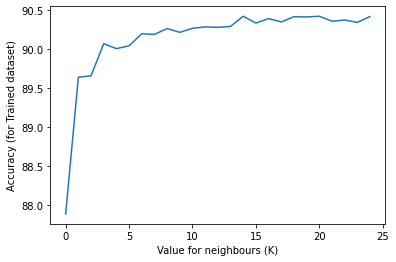

In [64]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_train1, X_test1, y_train1, y_test1 = train_test_split(final_data, y, test_size = 0.2, random_state = 101)

#for numbers of neighbours
neighbors = np.arange(0,25)

total_scores = []

for n in neighbors:
    n_k_value = n+1
    model_knn = KNeighborsClassifier(n_neighbors = n_k_value, weights='uniform', p=2, metric='euclidean')
    k_fold = model_selection.KFold(n_splits=10)
    results = model_selection.cross_val_score(model_knn, X_train1, y_train1, cv=k_fold, scoring='accuracy')
    total_scores.append(results.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (n_k_value, results.mean()*100, results.std()*100))

final_k = neighbors[total_scores.index(max(total_scores))]
print ("The final numbers of neighbour is %d (optimal number compared to others) with %0.1f%% accuracy" % (final_k, total_scores[final_k]))

plt.plot(neighbors, total_scores)
plt.xlabel('Value for neighbours (K)')
plt.ylabel('Accuracy (for Trained dataset)')
plt.show()

In [65]:
##appying KNeighbors model on dataset
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=22) 
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

print(confusion_matrix(y_test, KNN_pred))
print(round(accuracy_score(y_test, KNN_pred),2)*100)
KNN_Model = (cross_val_score(KNN, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7161  118]
 [ 703  256]]
90.0


In [66]:
##appying decision tree model on dataset
from sklearn.tree import DecisionTreeClassifier
dctree = DecisionTreeClassifier(criterion='gini')
dctree.fit(X_train, y_train)
dctpred = dctree.predict(X_test)

print(confusion_matrix(y_test, dctpred))
print(round(accuracy_score(y_test, dctpred),2)*100)
Decison_Tree = (cross_val_score(dctree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6793  486]
 [ 507  452]]
88.0


In [67]:
#applying Gaussian Naive Bayes model on dataset
from sklearn.naive_bayes import GaussianNB
G_NB= GaussianNB()
G_NB.fit(X_train, y_train)
G_NB_prdct = G_NB.predict(X_test)
probs = G_NB.predict(X_test)

print(confusion_matrix(y_test, G_NB_prdct))
print(round(accuracy_score(y_test, G_NB_prdct),2)*100)
GAUSIAN_NB = (cross_val_score(G_NB, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6467  812]
 [ 432  527]]
85.0


In [68]:
#applying ensemble model Random forest
from sklearn.ensemble import RandomForestClassifier
ENS_RFModel = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
ENS_RFModel.fit(X_train, y_train)
rfcpred = ENS_RFModel.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
ENS_RF = (cross_val_score(ENS_RFModel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7002  277]
 [ 502  457]]
91.0


In [69]:
#applying Logistic Regression model
from sklearn.linear_model import LogisticRegression
Logi_R_Model = LogisticRegression() 
Logi_R_Model.fit(X_train,y_train)
logpred = Logi_R_Model.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
Logi_R = (cross_val_score(Logi_R_Model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7108  171]
 [ 613  346]]
90.0


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train, y_train)
gbkpred = GB_model.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
Grand_Bst = (cross_val_score(GB_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7030  249]
 [ 470  489]]
91.0


In [71]:
ML_models = pd.DataFrame({
                'Classification_Models': ['Decision Tree',
                           'K-Near Neighbors', 'Gausian Naive Bayes', "Random Forest", "Logistic Regression", "Gradient Boosting"],
                'Accuracy Result':  [Decison_Tree, KNN_Model, GAUSIAN_NB, ENS_RF, Logi_R, Grand_Bst]})

ML_models.sort_values(by='Accuracy Result', ascending=False)

,Classification_Models,Accuracy Result
5,Gradient Boosting,0.915569
3,Random Forest,0.910804
4,Logistic Regression,0.910015
1,K-Near Neighbors,0.904279
0,Decision Tree,0.883399
2,Gausian Naive Bayes,0.844340


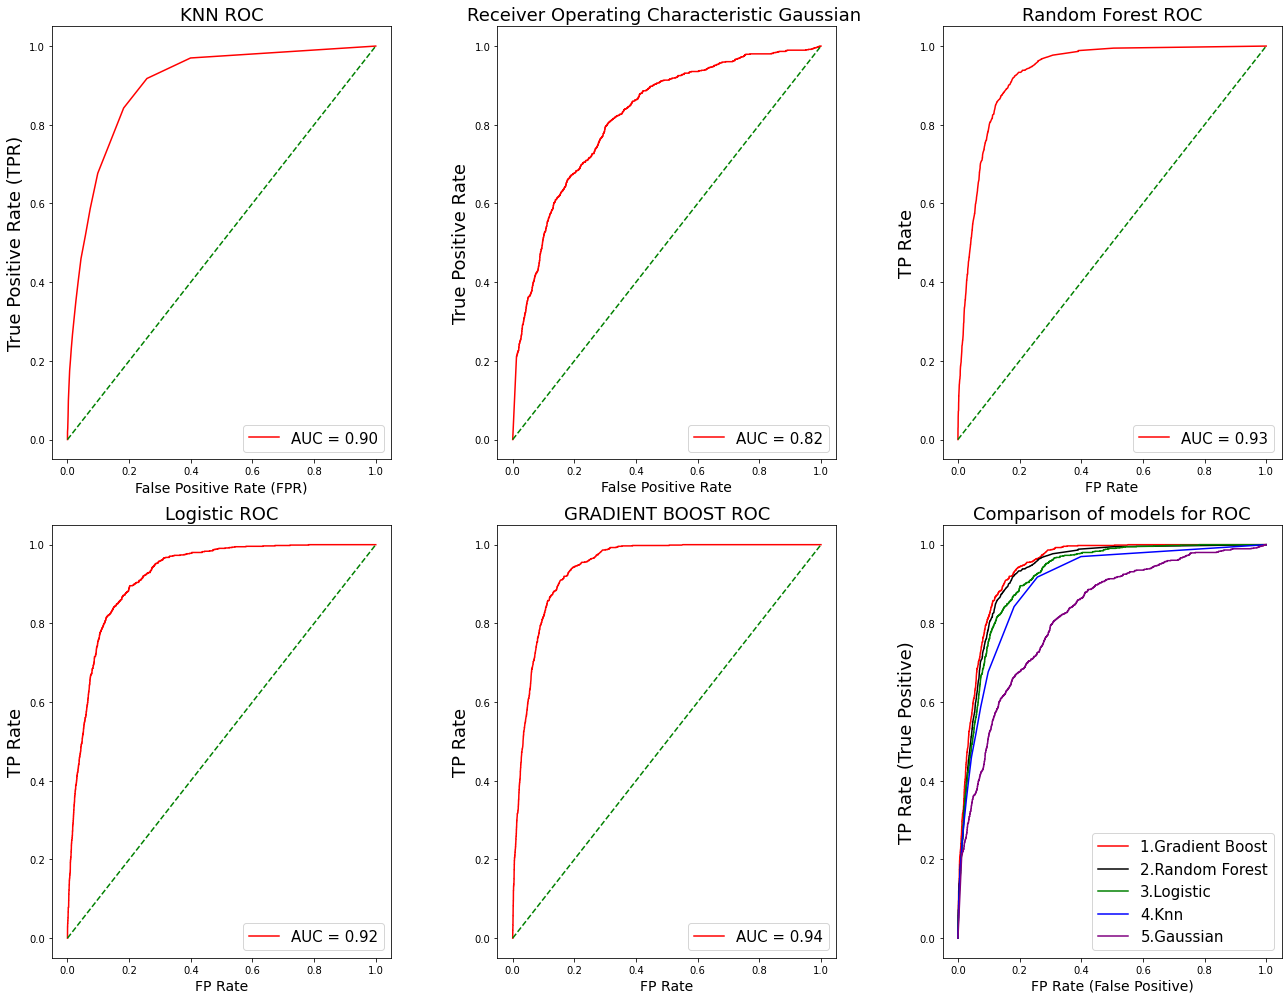

In [81]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (18,14))


#KNN----------------------
model1 = KNN.predict_proba(X_test)
pred_model1 = model1[:,1]
knn_fp, knn_tp, thresholdknn = metrics.roc_curve(y_test, pred_model1)
knn_ROC = metrics.auc(knn_fp, knn_tp)

ax_arr[0,0].plot(knn_fp, knn_tp, 'r', label = 'AUC = %0.2f' % knn_ROC)
ax_arr[0,0].plot([0, 1], [0, 1],'g--')
ax_arr[0,0].set_title('KNN ROC',fontsize=18)
ax_arr[0,0].set_ylabel('True Positive Rate (TPR)',fontsize=18)
ax_arr[0,0].set_xlabel('False Positive Rate (FPR)',fontsize=14)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 15})



#GRADIENT BOOST --------------------

model2 = GB_model.predict_proba(X_test)
pred_model2 = model2[:,1]
GB_fp, GB_tp, GB_threshold = metrics.roc_curve(y_test, pred_model2)
GB_roc = metrics.auc(GB_fp, GB_tp)

ax_arr[1,1].plot(GB_fp, GB_tp, 'r', label = 'AUC = %0.2f' % GB_roc)
ax_arr[1,1].plot([0, 1], [0, 1],'g--')
ax_arr[1,1].set_title('GRADIENT BOOST ROC',fontsize=18)
ax_arr[1,1].set_ylabel('TP Rate',fontsize=18)
ax_arr[1,1].set_xlabel('FP Rate',fontsize=14)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 15})



#GAUSSIAN ---------------------
model3 = G_NB.predict_proba(X_test)
pred_model3 = model3[:,1]
GNB_fp, GNB_tp, thresholdgau = metrics.roc_curve(y_test, pred_model3)
GNB_roc = metrics.auc(GNB_fp, GNB_tp)

ax_arr[0,1].plot(GNB_fp, GNB_tp, 'r', label = 'AUC = %0.2f' % GNB_roc)
ax_arr[0,1].plot([0, 1], [0, 1],'g--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=18)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=18)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=14)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 15})




#RANDOM FOREST --------------------
model4 = ENS_RFModel.predict_proba(X_test)
pred_model4 = model4[:,1]
RF_fp, RF_tp, thresholdrfc = metrics.roc_curve(y_test, pred_model4)
RF_roc = metrics.auc(RF_fp, RF_tp)

ax_arr[0,2].plot(RF_fp, RF_tp, 'r', label = 'AUC = %0.2f' % RF_roc)
ax_arr[0,2].plot([0, 1], [0, 1],'g--')
ax_arr[0,2].set_title('Random Forest ROC',fontsize=18)
ax_arr[0,2].set_ylabel('TP Rate',fontsize=18)
ax_arr[0,2].set_xlabel('FP Rate',fontsize=14)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 15})




#LOGMODEL
model5 = Logi_R_Model.predict_proba(X_test)
pred_model5 = model5[:,1]
Log_fp, Log_tp, thresholdlog = metrics.roc_curve(y_test, pred_model5)
Log_roc = metrics.auc(Log_fp, Log_tp)

ax_arr[1,0].plot(Log_fp, Log_tp, 'r', label = 'AUC = %0.2f' % Log_roc)
ax_arr[1,0].plot([0, 1], [0, 1],'g--')
ax_arr[1,0].set_title('Logistic ROC',fontsize=18)
ax_arr[1,0].set_ylabel('TP Rate',fontsize=18)
ax_arr[1,0].set_xlabel('FP Rate',fontsize=14)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 15})



#ALL PLOTS ----------------------------------

ax_arr[1,2].plot(GB_fp, GB_tp, 'b', label = '1.Gradient Boost', color='r')
ax_arr[1,2].plot(RF_fp, RF_tp, 'b', label = '2.Random Forest', color='black')
ax_arr[1,2].plot(Log_fp, Log_tp, 'b', label = '3.Logistic', color='g')
ax_arr[1,2].plot(knn_fp, knn_tp, 'b', label = '4.Knn', color='b')
ax_arr[1,2].plot(GNB_fp, GNB_tp, 'b', label = '5.Gaussian', color='purple')

ax_arr[1,2].set_title('Comparison of models for ROC',fontsize=18)
ax_arr[1,2].set_ylabel('TP Rate (True Positive)',fontsize=18)
ax_arr[1,2].set_xlabel('FP Rate (False Positive)',fontsize=14)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 15})

plt.subplots_adjust(wspace=0.18)
plt.tight_layout() 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, KNN_pred))

KNN Confusion Matrix
 [[7150  129]
 [ 702  257]]


In [ ]:
print('KNN Reports\n',classification_report(y_test, KNN_pred))

KNN Reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7279
           1       0.67      0.27      0.38       959

    accuracy                           0.90      8238
   macro avg       0.79      0.63      0.66      8238
weighted avg       0.88      0.90      0.88      8238



In [ ]:
print('Decision Tree Reports\n',classification_report(y_test, dctpred))

Decision Tree Reports
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7279
           1       0.48      0.46      0.47       959

    accuracy                           0.88      8238
   macro avg       0.70      0.70      0.70      8238
weighted avg       0.88      0.88      0.88      8238



In [ ]:
print('Gaussian NB Reports\n',classification_report(y_test, G_NB_prdct))

Gaussian NB Reports
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      7279
           1       0.39      0.55      0.46       959

    accuracy                           0.85      8238
   macro avg       0.67      0.72      0.69      8238
weighted avg       0.87      0.85      0.86      8238



In [ ]:

print('Random forest Reports\n',classification_report(y_test, rfcpred))

Random forest Reports
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7279
           1       0.63      0.48      0.54       959

    accuracy                           0.91      8238
   macro avg       0.78      0.72      0.75      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:

print('Logistic Regression Reports\n',classification_report(y_test, logpred))

Logistic Regression Reports
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7279
           1       0.67      0.36      0.47       959

    accuracy                           0.90      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.89      0.90      0.89      8238



In [ ]:
print('Gradient Boosting Reports\n',classification_report(y_test, gbkpred))

Gradient Boosting Reports
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7279
           1       0.66      0.51      0.58       959

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



#NN

In [ ]:
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(X_smote))

Original dataset shape 32950
Resampled dataset shape 58538


In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
s = StandardScaler()
model_history=classifier.fit(s.fit_transform(X_smote), y_smote,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
3922/3922 [==============================] - 10s 2ms/step - loss: 0.4012 - accuracy: 0.8074 - val_loss: 0.6574 - val_accuracy: 0.6400
Epoch 2/100
3922/3922 [==============================] - 8s 2ms/step - loss: 0.3049 - accuracy: 0.8523 - val_loss: 0.6203 - val_accuracy: 0.7100
Epoch 3/100
3922/3922 [==============================] - 9s 2ms/step - loss: 0.2927 - accuracy: 0.8623 - val_loss: 0.5744 - val_accuracy: 0.7690
Epoch 4/100
3922/3922 [==============================] - 9s 2ms/step - loss: 0.2869 - accuracy: 0.8675 - val_loss: 0.5580 - val_accuracy: 0.7916
Epoch 5/100
3922/3922 [==============================] - 9s 2ms/step - loss: 0.2831 - accuracy: 0.8705 - val_loss: 0.5787 - val_accuracy: 0.7819
Epoch 6/100
3922/3922 [==============================] - 9s 2ms/step - loss: 0.2805 - accuracy: 0.8721 - val_loss: 0.5431 - val_accuracy: 0.8061
Epoch 7/100
3922/3922 [==============================] - 9s 2ms/step - loss: 0.2784 - accuracy: 0.8734 - val_loss: 0.5559 - val_a

In [ ]:

corr = df.corr()
corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


In [ ]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7279
           1       0.69      0.26      0.38       959

    accuracy                           0.90      8238
   macro avg       0.80      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238



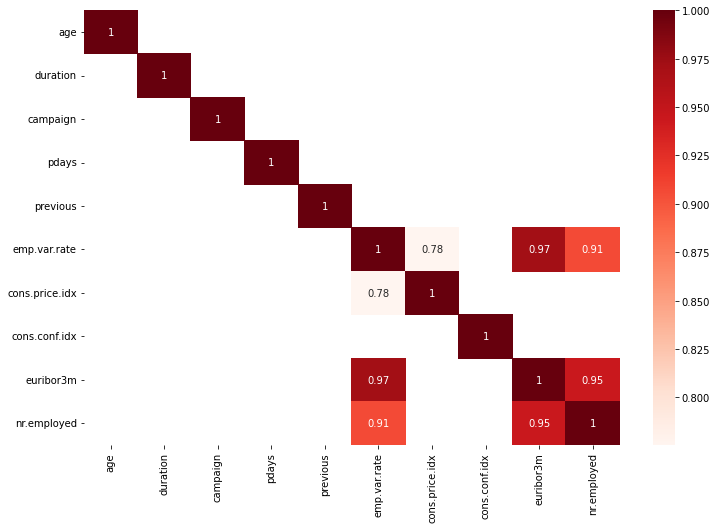

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);